Laura Michel Bolivar Rincon

#Importar Librerias

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Conectarse a google Drive y cargar el CSV con el dataset

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importar Base de Datos

In [154]:
df=pd.DataFrame
df=pd.read_csv('https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/mercadeo_bancario.csv', encoding='utf-8')

#Conocemos la base de datos 

In [155]:
df.head(5)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [156]:
df.shape

(41188, 19)

In [157]:
df.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

##Los datos escogidos fueron del grupo B :
*   edad, trabajo , credito_sin_pago , valor_prestamo , dia_semana ,si_no




##Verificamos las catergorias de los datos No numericos 

###Trabajo

In [158]:
lista_categoria_trabajo=list(df['trabajo'].value_counts().index)
print(lista_categoria_trabajo)

['admin.', 'blue-collar', 'technician', 'services', 'management', 'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed', 'student', 'unknown']


In [159]:
df['trabajo'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: trabajo, dtype: int64

###credito_sin_pago

In [160]:
lista_categoria_sin_pago=list(df['credito_sin_pago'].value_counts().index)
print(lista_categoria_sin_pago)

['no', 'unknown', 'yes']


In [161]:
df['credito_sin_pago'].value_counts()

no         32362
unknown     8528
yes          298
Name: credito_sin_pago, dtype: int64

###dia_semana

In [162]:
lista_categoria_dia_semana=list(df['dia_semana'].value_counts().index)
print(lista_categoria_dia_semana)

['thu', 'mon', 'wed', 'tue', 'fri']


In [163]:
df['dia_semana'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: dia_semana, dtype: int64

In [164]:
df['edad'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: edad, Length: 78, dtype: int64

In [165]:
df['valor_prestamo'].value_counts()

0         17055
481168        4
208079        3
134848        3
66847         3
          ...  
305632        1
41441         1
432614        1
188905        1
51401         1
Name: valor_prestamo, Length: 23579, dtype: int64

##conversion de datos de texto a numericos 

**Trabajo**

*   Unknown = 0
*   admin = 1
*   blue-collar =2
*   technician = 3
*   services = 4
*   management = 5  
*   retired = 6
*   entrepreneur =7 
*   self-employed = 8
*   housemaid = 9
*   unemployed =10
*   student= 11
---
**credito_sin_pago**
*   Unknown = 0
*   no = 1
*   yes = 2

---

**dia_semana**
*   thu =0
*   mon = 1
*   wed = 2
*   tue = 3
*   fri= 4


###Utilizamos la libreria PANDAS con su caracteristisca replace , para reemplazar los valores 

In [166]:
#Reemplazo de datos trabajo
df.trabajo.replace({"unknown":0,"admin.":1,"blue-collar":2,"technician":3,"services":4,
                   "management":5,"retired":6,"entrepreneur":7,"self-employed":8,"housemaid":9 , "unemployed":10,"student":11}, inplace=True)

#Reemplazo de credito_sin_pago
df.credito_sin_pago.replace({"unknown":0,"no":1,"yes":2}, inplace=True)

#Reemplazo de dia_semana 
df.dia_semana.replace({"thu":0,"mon":1,"wed":2,"tue":3,"fri":4}, inplace=True)


In [168]:
df.head(5)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,2,married,preschool,7,0,yes,no,268017,0,5,cellular,aug,0,210,43,0,88,0
1,53,3,married,unknown,1,1,no,no,0,0,0,cellular,nov,4,138,0,0,14,0
2,28,5,single,university.degree,3,1,yes,no,308036,0,0,cellular,jun,0,339,27,2,1993,1
3,39,4,married,Technological_school,1,1,no,no,0,0,4,cellular,apr,4,185,0,0,1338,0
4,55,6,married,preschool,2,1,yes,no,249888,0,4,cellular,aug,4,137,2,1,1184,1


#Regresión lineal

##Matriz de correlación

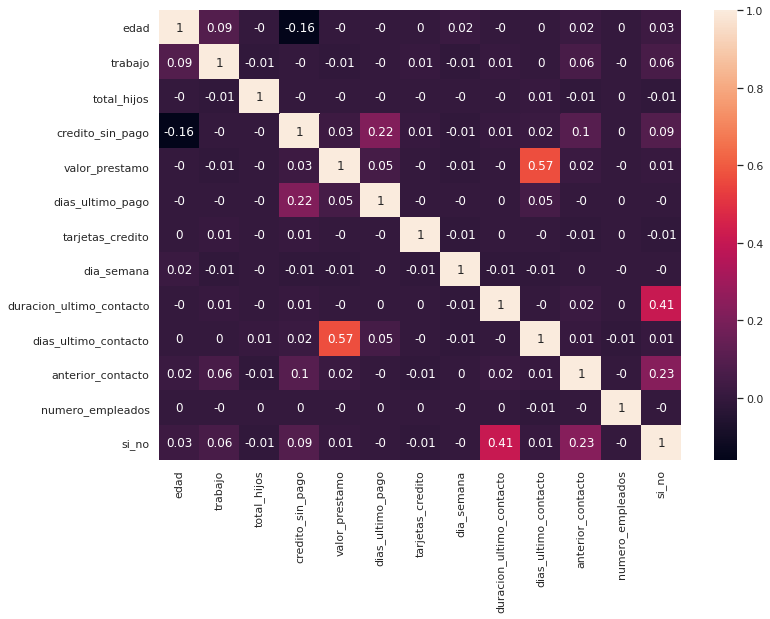

In [169]:
correlation_matrix=df.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

##Tabla solo con las variables escogidas anteriormente 

In [170]:
filter_data = {"edad":df["edad"],"trabajo":df["trabajo"],"credito_sin_pago":df["credito_sin_pago"],"valor_prestamo":df["valor_prestamo"],
        "dia_semana":df["dia_semana"],"si_no":df["si_no"]}
filter_dataset = pd.DataFrame(data=filter_data)
print(filter_dataset)

       edad  trabajo  credito_sin_pago  valor_prestamo  dia_semana  si_no
0        44        2                 0          268017           0      0
1        53        3                 1               0           4      0
2        28        5                 1          308036           0      1
3        39        4                 1               0           4      0
4        55        6                 1          249888           4      1
...     ...      ...               ...             ...         ...    ...
41183    59        6                 0          280875           0      0
41184    31        9                 0               0           0      0
41185    42        1                 2          138636           2      0
41186    48        3                 2          138176           3      0
41187    25       11                 1               0           4      0

[41188 rows x 6 columns]


##Grafica de las variables 


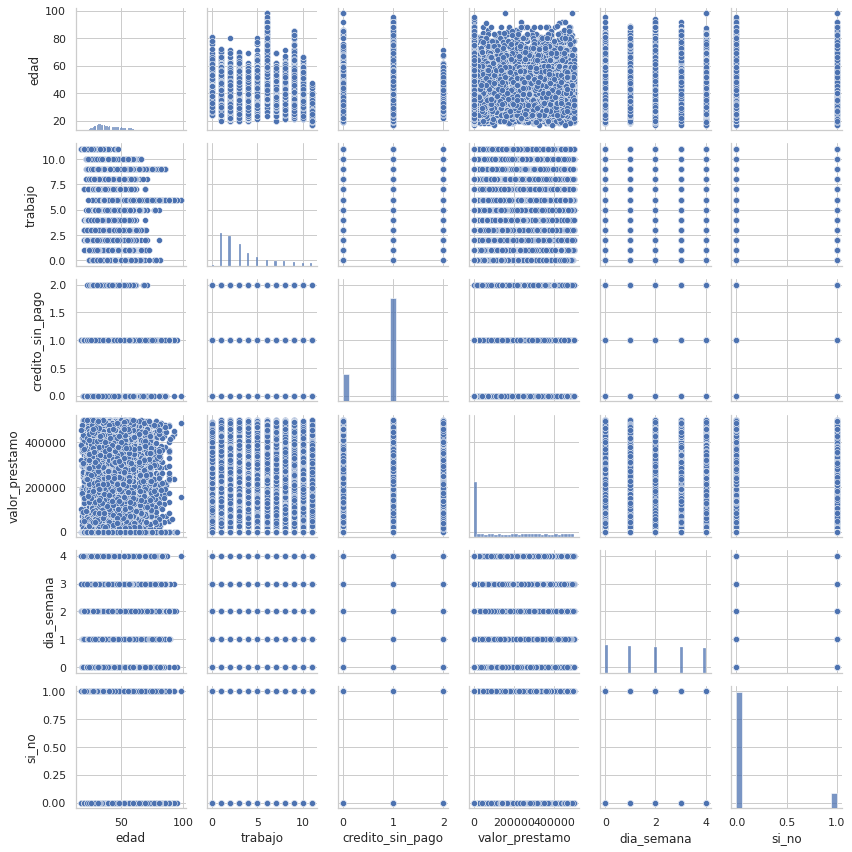

In [171]:
sns.set(style='whitegrid', context='notebook')
features_plot = filter_dataset.columns
sns.pairplot(filter_dataset[features_plot], height=2.0);
plt.tight_layout()
plt.show()

In [172]:
X = pd.DataFrame(np.c_[filter_dataset['edad'] , filter_dataset['trabajo'] , filter_dataset['credito_sin_pago'], filter_dataset['valor_prestamo'], filter_dataset['dia_semana']],
                 columns=['edad','trabajo','credito_sin_pago','valor_prestamo','dia_semana'])
Y = df['si_no']

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (32950, 5), x20%: (8238, 5)
y80%: (32950,), y20%: (8238,)


In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

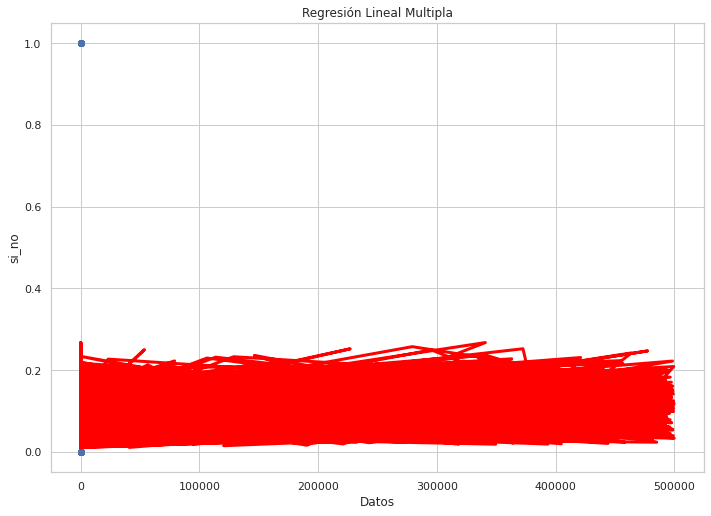


PRECISIÓN DEL MODELO REGRESIÓN LINEAL MULTIPLA
0.014559449228760069


In [178]:
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['edad'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Multipla')
plt.xlabel('Datos')
plt.ylabel('si_no')
plt.show()
print('\nPRECISIÓN DEL MODELO REGRESIÓN LINEAL MULTIPLA')
print(lin_model.score(X_train, Y_train))

#Regresion Logistica

##Separando datos para el entrenamiento

In [179]:
data = {"edad":df["edad"],"trabajo":df["trabajo"],"credito_sin_pago":df["credito_sin_pago"],"valor_prestamo":df["valor_prestamo"],
        "dia_semana":df["dia_semana"]}
X = pd.DataFrame(data=data)
y = np.array(df["si_no"])

x_train , x_test , y_train , y_test = train_test_split(X,y,random_state=4, test_size=0.2)

#instancia de LogisticRegression
regresion_logistica = LogisticRegression()
#Entrenamiento
regresion_logistica.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Generando Probabilidades de Prediccion

In [180]:
y_prediccion =regresion_logistica.predict(x_test)
#verificar exactitud
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud porcentual = "+str(100*exactitud))

exactitud porcentual = 88.50449138140326


##Predicciones

In [183]:
pruebaarray = np.array([[55,6,1,249888,4],[20,0,2,5,125],[80,2,2,3,5000],[30,3,1,3,150],[28,4,1,0,200],[31,5,2,5,500]])
x_nuevo = pd.DataFrame(pruebaarray,columns=["edad","trabajo","credito_sin_pago","valor_prestamo","dia_semana"])
y_prediccion = regresion_logistica.predict(x_nuevo)
print(y_prediccion)

[0 0 0 0 0 0]
